In [1]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from keras.applications import VGG16


from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras import optimizers


from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D, Dropout

from pickle import dump

from tensorflow.keras.applications.inception_v3 import InceptionV3

In [2]:
def build4():
# InceptionV3 model and use the weights from imagenet
    conv_base = InceptionV3(weights = 'imagenet', #Useing the inception_v3 CNN that was trained on ImageNet data.  
                  include_top = False)

    for layer in conv_base.layers:
        layer.trainable = False

    InceptionV3_model = conv_base.output
    pool = GlobalAveragePooling2D()(InceptionV3_model)
    dense_1 = Dense(512, activation = 'relu')(pool)
    output = Dense(NUM_CLASSES, activation = 'softmax')(dense_1)
#     x = GlobalAveragePooling2D()(x)
#     x = Dense(64, activation='relu')(x) 
#     x = Dropout(0.1)(x)
#     x = Dense(32, activation='relu')(x) 
#     x = Dropout(0.2)(x)
#     predictions = Dense(NUM_CLASSES, activation='softmax')(x)
    model = Model(conv_base.input, output)
    
    model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])
    
    return model

In [3]:
NUM_CLASSES = 4
def build2():
    conv_base = ResNet50(include_top=False)
    
    for layer in conv_base.layers:
        layer.trainable = False

    x = conv_base.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(64, activation='relu')(x) 
    x = Dropout(0.1)(x)
    x = Dense(32, activation='relu')(x) 
    x = Dropout(0.2)(x)
    predictions = Dense(NUM_CLASSES, activation='softmax')(x)
    model = Model(conv_base.input, predictions)
    
    # optimizer = optimizers.Adam()
    optimizer = optimizers.Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    
    return model

In [4]:
def build3():
    """
    loss: 0.5012 - accuracy: 0.8120 - val_loss: 0.4087 - val_accuracy: 0.8596
    """
    NUM_CLASSES = 4
    
    conv_base = VGG16(include_top=False)
    
    for layer in conv_base.layers:
        layer.trainable = False
        
    x = conv_base.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(64, activation='relu')(x) 
    x = Dropout(0.1)(x)
    x = Dense(32, activation='relu')(x) 
    x = Dropout(0.2)(x)
    predictions = Dense(NUM_CLASSES, activation='softmax')(x)
    model = Model(conv_base.input, predictions)
    # optimizer = optimizers.Adam()
    optimizer = optimizers.Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

In [5]:
import keras
def build_model():
    model = keras.models.Sequential([
        keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
        keras.layers.Conv2D(64, (3,3), activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Dropout(.2),
        
        keras.layers.Conv2D(128, (3,3), activation='relu'), 
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Dropout(.2),
        
        keras.layers.Flatten(), 
        keras.layers.Dense(128, activation='relu'), 
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(.3),
        keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

#     model.compile(optimizer=optimizers.RMSprop(lr=0.01), loss='categorical_crossentropy', metrics=['acc'])
    optimizer = optimizers.Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

    return model

In [13]:
model = build3()

In [14]:
import keras
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

In [15]:
bs = 32
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     shear_range=0.15,
    zoom_range=0.1,
#     horizontal_flip=True, 
    validation_split=0.2
)


In [20]:
train_dir = 'fruits/'

image_generator = ImageDataGenerator(rescale=1.0/255.0, 
                                     rotation_range=20,
                                     validation_split=0.2,
                                    fill_mode='constant') 


train_generator = image_generator.flow_from_directory(
    train_dir,  # This is the source directory for training images
    target_size=(128, 128),  # All images will be resized to 256x256
    shuffle=True,
    batch_size=bs,
    class_mode='categorical',
    subset='training')

Found 468 images belonging to 4 classes.


In [21]:
validation_generator = image_generator.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(128, 128),
    batch_size=bs,
    shuffle=True,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 114 images belonging to 4 classes.


In [22]:
keras.backend.clear_session()

In [23]:
model.fit(
    train_generator,
#     steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    batch_size=bs,
#     validation_steps = validation_generator.samples // batch_size,
    epochs = 15)

Epoch 1/15
15/15 [==============================] - 20s 1s/step - loss: 0.9668 - accuracy: 0.6346 - val_loss: 0.8005 - val_accuracy: 0.7456
Epoch 2/15
15/15 [==============================] - 23s 2s/step - loss: 0.9304 - accuracy: 0.6239 - val_loss: 0.7396 - val_accuracy: 0.7281
Epoch 3/15
15/15 [==============================] - 22s 1s/step - loss: 0.8651 - accuracy: 0.6496 - val_loss: 0.7006 - val_accuracy: 0.7632
Epoch 4/15
15/15 [==============================] - 21s 1s/step - loss: 0.7801 - accuracy: 0.7094 - val_loss: 0.6901 - val_accuracy: 0.7632
Epoch 5/15
15/15 [==============================] - 21s 1s/step - loss: 0.7874 - accuracy: 0.6795 - val_loss: 0.6436 - val_accuracy: 0.7632
Epoch 6/15
15/15 [==============================] - 21s 1s/step - loss: 0.6977 - accuracy: 0.7073 - val_loss: 0.6022 - val_accuracy: 0.7982
Epoch 7/15
15/15 [==============================] - 20s 1s/step - loss: 0.7053 - accuracy: 0.7201 - val_loss: 0.5956 - val_accuracy: 0.7807
Epoch 8/15
15/15 [==

In [24]:
model.save('fruits_model_3')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: fruits_model_3/assets


In [31]:
learn = keras.models.load_model('fruits_model_2/')

In [32]:
import PIL
import numpy as np
image = PIL.Image.open('fruits/peach/00000033.jpg').resize((128,128))

In [39]:
x = np.array(image)/255.
# x = keras.applications.vgg16.preprocess_input(
#     x, data_format=None
# )
x = np.stack([x])

In [40]:
predict = learn.predict(x)
list(predict[0]).index(max(predict[0]))

0

In [41]:
predict

array([[1.0000000e+00, 0.0000000e+00, 6.3972032e-24, 8.2563723e-14]],
      dtype=float32)

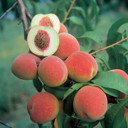

In [36]:
image

In [37]:
label_map = (train_generator.class_indices)

In [38]:
label_map

{'apple': 0, 'banana': 1, 'orange': 2, 'peach': 3}